In [2]:
import sys
import os
from matplotlib import pyplot as plt
import torch

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("visualize_attention_scores.ipynb"))))

from model_utils import MultiHeadAttentionBlock

In [3]:
# Define the attention block
# with lets say 8 heads
seq_len = 10  # define the seq_len to 10

attention_block = MultiHeadAttentionBlock(d_model=256, h=8, dropout=0.1)

In [34]:
# Now lets define the input embeddings for the key and query
key_emb = torch.randn((1, 8, seq_len, 256))
q_emb = torch.randn((1, 8, seq_len, 256))
value_emb = torch.randn((1, 8, seq_len, 256))

# define mask
mask = (torch.triu(torch.ones((seq_len, seq_len)), diagonal=1).type(torch.uint8) == 1).unsqueeze(0).unsqueeze(0)
print(mask.shape)
print(mask)


out, attn_scores = attention_block.attention(
    q_emb,
    key_emb,
    value_emb,
    mask=mask,
    dropout=torch.nn.Dropout(0.1)
    # dropout = None
    )

torch.Size([1, 1, 10, 10])
tensor([[[[False,  True,  True,  True,  True,  True,  True,  True,  True,  True],
          [False, False,  True,  True,  True,  True,  True,  True,  True,  True],
          [False, False, False,  True,  True,  True,  True,  True,  True,  True],
          [False, False, False, False,  True,  True,  True,  True,  True,  True],
          [False, False, False, False, False,  True,  True,  True,  True,  True],
          [False, False, False, False, False, False,  True,  True,  True,  True],
          [False, False, False, False, False, False, False,  True,  True,  True],
          [False, False, False, False, False, False, False, False,  True,  True],
          [False, False, False, False, False, False, False, False, False,  True],
          [False, False, False, False, False, False, False, False, False, False]]]])


In [35]:
attn_scores = attn_scores.squeeze()
attn_scores.shape

torch.Size([8, 10, 10])

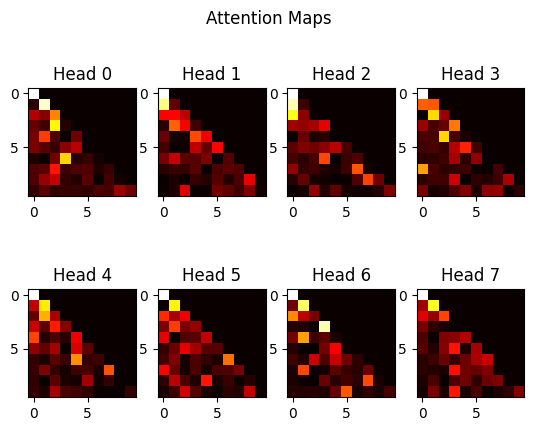

In [36]:
# Plot attn scores for each head
fig, axs = plt.subplots(nrows=2, ncols=4)
fig.suptitle("Attention Maps")
for j, attn_score in enumerate(attn_scores):
    # assert (attn_score.sum(dim=-1) == 1.0).all() # not the case as we have used dropout
    row = j // 4
    col = j % 4
    axs[row, col].imshow(attn_score.numpy(), cmap="hot")
    axs[row, col].set_title("Head {}".format(j))

In [41]:
x_emb = torch.randn((1, seq_len, 3 * 256))

for d in x_emb.split(256, dim=2):
    print(d.shape)


torch.Size([1, 10, 256])
torch.Size([1, 10, 256])
torch.Size([1, 10, 256])
